In [1]:
# Load the "autoreload" extension
%load_ext autoreload

# always reload modules marked with "%aimport"
%autoreload 1

import os
import sys

# add the 'src' directory as one where we can import modules
src_dir = os.path.join(os.getcwd(), os.pardir, 'src', 'data')
sys.path.append(src_dir)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import metrics
from tqdm import tqdm

In [3]:
%aimport scrape_buda

In [4]:
interim_dir = os.path.join(os.getcwd(), os.pardir, 'data', 'interim')

In [9]:
figures_dir = os.path.join(os.getcwd(), os.pardir, 'reports', 'figures')

In [5]:
from scrape_buda import BudaRating

In [6]:
ratings = scrape_buda.BudaRating()
prefix = os.path.join(interim_dir, 'data20160521')
ratings.load_buda(prefix)

In [116]:
ratings.predicted_rating()

100%|██████████| 3031/3031 [05:44<00:00,  8.80it/s]


In [24]:
ratings.allteams.to_csv(os.path.join(interim_dir, 'withselfcaptain_ratings.csv'))

In [7]:
ratings.allteams = pd.read_csv(os.path.join(interim_dir, 'withselfcaptain_ratings.csv'))

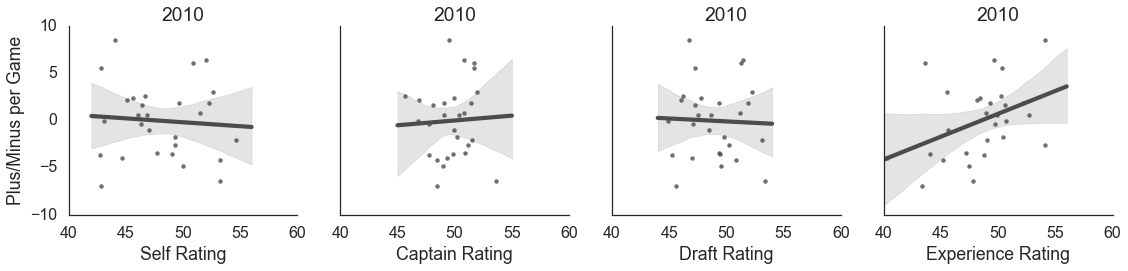

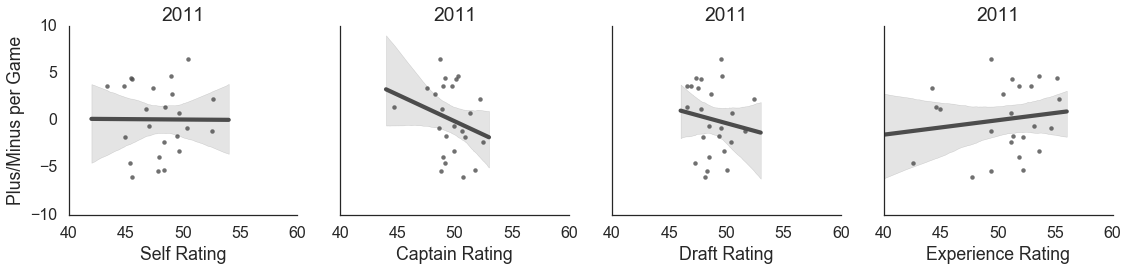

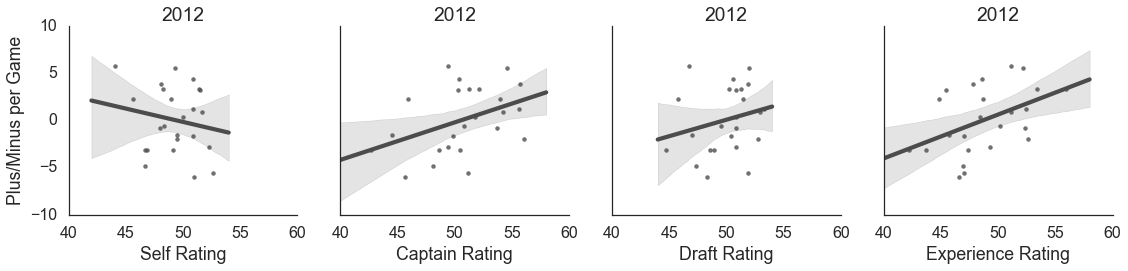

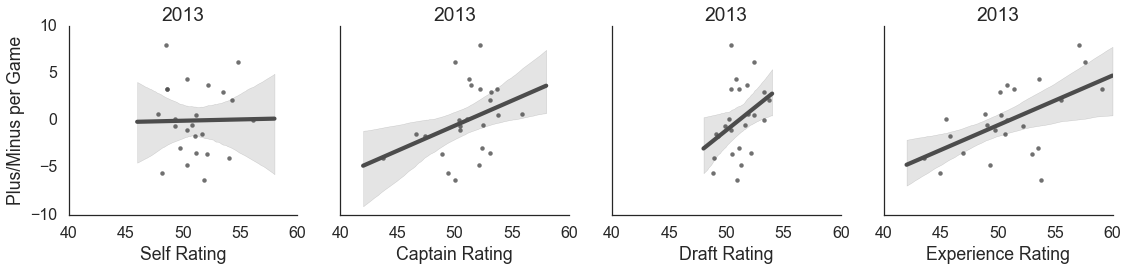

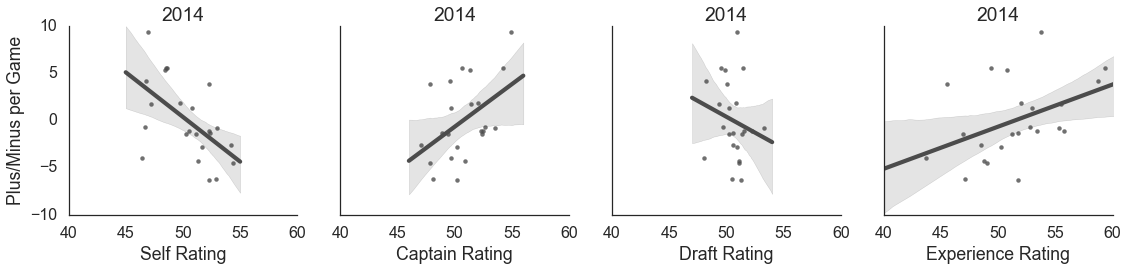

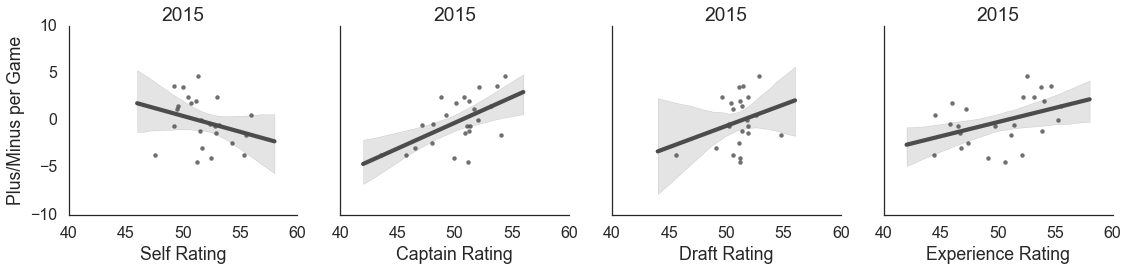

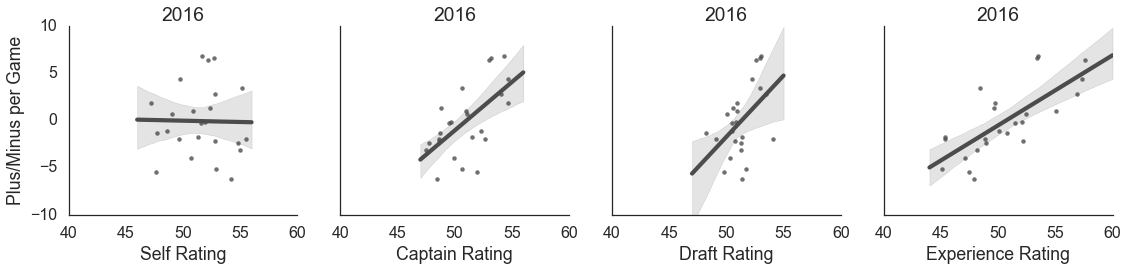

In [15]:
sns.set_context('poster')
sns.set_style('white')
for year in range(2010, 2017):
    index = (ratings.allteams['year'] == year) & \
        (ratings.allteams['type'] == 'Hat') & \
        (ratings.allteams['season'] == 'Spring') & \
        (ratings.allteams['divname'] == 'JP Mixed (4/3)')
    okdf = ratings.allteams[index]
    okdf['experience_converted'] = scrape_buda.experience_to_self(okdf['experience_rating'])
    okdf = okdf.rename(columns={'self_rating':'Self Rating', 
                         'captain_rating':'Captain Rating', 
                         'draft_rating':'Draft Rating',
                         'experience_converted': 'Experience Rating', 
                         'plusminus': 'Plus/Minus per Game'})
    g = sns.PairGrid(okdf, y_vars=["Plus/Minus per Game"], 
                     x_vars=["Self Rating", "Captain Rating", "Draft Rating", "Experience Rating"], size=4)
    g.map(sns.regplot, color=".3")
#     plt.title(year)
    g.set(ylim=(-10, 10), xlim=(40, 60), title=year)
    plt.savefig(os.path.join(figures_dir, 'RatingComparison_{}'.format(year)))

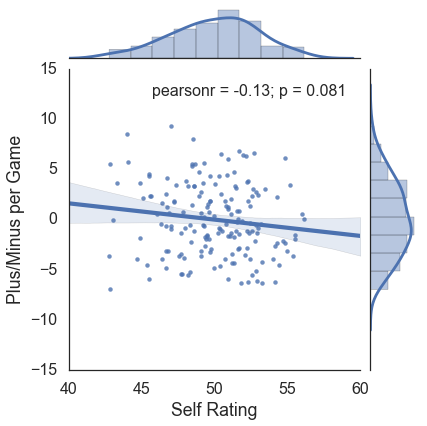

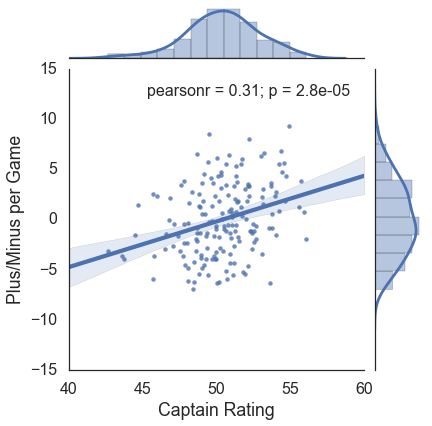

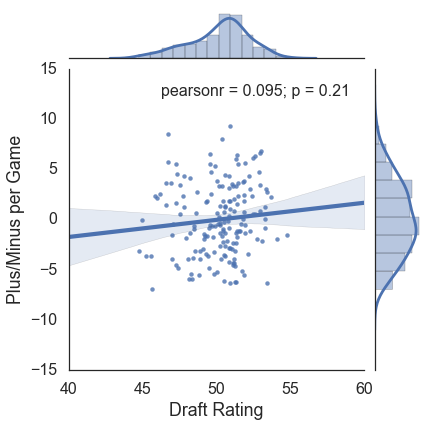

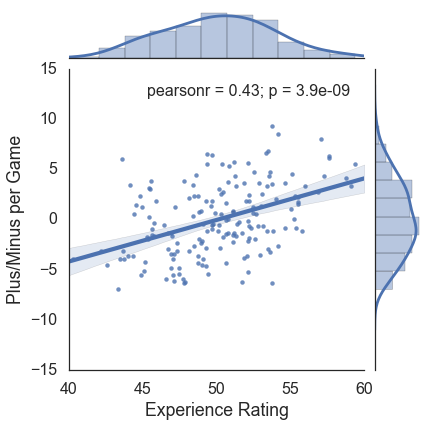

In [17]:
sns.set_context('poster')
sns.set_style('white')
# for year in range(2010, 2016):
index = (ratings.allteams['year'] < 2017) & (ratings.allteams['year'] >= 2010) & \
    (ratings.allteams['type'] == 'Hat') & \
    (ratings.allteams['season'] == 'Spring') & \
    (ratings.allteams['divname'] == 'JP Mixed (4/3)')
sph = ratings.allteams[index]

zscale = scrape_buda.experience_to_self(sph['experience_rating'].values)
# f, axes = plt.subplots(1, 4)
# f.set_size_inches(18,4)
# ax = axes[0]
g = sns.jointplot(sph['self_rating'].values, sph['plusminus'].values, kind='reg', xlim=[40,60], size=6, ylim=[-15,15])
ax = plt.gca()
ax.set_xlabel('Self Rating')
ax.set_ylabel('Plus/Minus per Game')
plt.savefig(os.path.join(figures_dir, 'SelfRatingComparison'))

g = sns.jointplot(sph['captain_rating'].values, sph['plusminus'].values, kind='reg', xlim=[40,60], size=6)
ax = plt.gca()
ax.set_xlabel('Captain Rating')
ax.set_ylabel('Plus/Minus per Game')
plt.savefig(os.path.join(figures_dir, 'CaptainRatingComparison'))

g = sns.jointplot(sph['draft_rating'].values, sph['plusminus'].values, kind='reg', xlim=[40,60], size=6)
ax = plt.gca()
ax.set_xlabel('Draft Rating')
ax.set_ylabel('Plus/Minus per Game')
plt.savefig(os.path.join(figures_dir, 'DraftRatingComparison'))

sns.jointplot(zscale, sph['plusminus'].values, kind='reg', xlim=[40,60], size=6)
ax = plt.gca()
ax.set_xlabel('Experience Rating')
ax.set_ylabel('Plus/Minus per Game')
plt.savefig(os.path.join(figures_dir, 'ExperienceRatingComparison'))

# ax.set_xlim([30, 60])
#     plt.plot(zscale, sph['plusminus'], '.', color='salmon')
#     plt.plot(sph['self_rating'], sph['plusminus'], '.', color='cyan')
#     zscale = (sph['experience_rating'] - sph['experience_rating'].mean()) / sph['experience_rating'].std()
#     plt.plot(zscale, sph['plusminus'], '.')

In [176]:
ratings.allteams.loc[ratings.allteams['teamid'] == 34600, 'type'].values[0]

'Hat'

In [64]:
self_ratings = pd.read_csv(os.path.join(interim_dir, 'data20160521_selfcaptain_ratings.csv'))

In [65]:
self_ratings.columns

Index([u'Unnamed: 0', u'Unnamed: 0.1', u'user_id', u'league_id', u'rank_type',
       u'status', u'edited_by', u'rank', u'experience', u'other_sport',
       u'throwing', u'break_mark', u'huck', u'receiving', u'height', u'speed',
       u'shirt', u'recommend_captain', u'first_name', u'last_name',
       u'edited_date', u'last_login', u'league_name', u'season',
       u'captain_rank'],
      dtype='object')

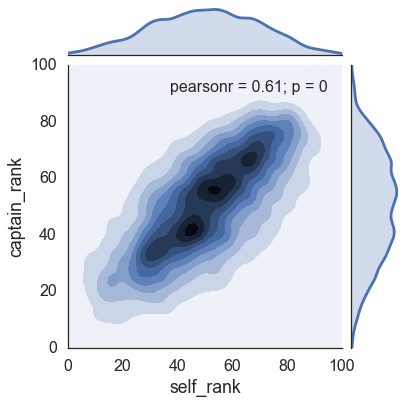

In [113]:
self_ratings['self_rank'] = 2 * self_ratings['rank'] - self_ratings['captain_rank']
ok = (self_ratings['self_rank'] >= 0) & (self_ratings['self_rank'] <= 100)
sns.jointplot(self_ratings.loc[ok, 'self_rank'], self_ratings.loc[ok, 'captain_rank'], 
              kind='kde', xlim=[0,100], ylim=[0,100])

In [15]:
dfallteams = pd.read_csv(os.path.join(interim_dir, 'withselfcaptain_ratings.csv'))

In [8]:
dfallteams.columns

Index([u'Unnamed: 0', u'Unnamed: 0.1', u'divname', u'divrating', u'plusminus',
       u'season', u'teamid', u'teamname', u'type', u'year', u'self_rating',
       u'captain_rating', u'draft_rating', u'experience_rating'],
      dtype='object')

In [10]:
ok = (dfallteams['divname'] == 'JP Mixed (4/3)') & \
     (dfallteams['season'] == 'Spring') & \
     (dfallteams['type'] == 'Hat') & \
     (dfallteams['year'] == 2011)

In [12]:
sph2011 = dfallteams[ok]

In [21]:
sph2011 = ratings.validate_rating()

 79%|███████▉  | 19/24 [00:02<00:00,  7.38it/s]

(u'Lee, Andy', array([ 69.,  51.]))


100%|██████████| 24/24 [00:03<00:00,  6.49it/s]


In [22]:
sph2011.to_csv(os.path.join(interim_dir, 'validate_sph2011.csv'))

Validation is confirmed -- The captain's ratings, self ratings, and draft ratings I've calculated from the database match those in the spreadsheet from when I was a captain on Skynet (Spring hat league, 2011, JP Mixed).